In [47]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [48]:
# open data folder from cvs file
# files are obtained from https://health-infobase.canada.ca/covid-19/
path = 'covid19.csv'
df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
1,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN,NaN,3,3
2,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,NaN,NaN,NaN,1,1
3,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN,NaN,4,4
4,35,Ontario,Ontario,8/2/2020,3,0,0,3,NaN,NaN,NaN,NaN,0,0


In [49]:
#reject unwanted naming conventions
df.drop(13, axis=1, inplace=True)


df.drop(11, axis=1, inplace=True)
df.drop(10, axis=1, inplace=True)
df.drop(9, axis=1, inplace=True)
df.drop(8, axis=1, inplace=True)
df.drop(2,axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)

df.head()

,0,1,3,4,5,6,7,12
1,35,Ontario,31-01-2020,3,0,0,3,3
2,59,British Columbia,31-01-2020,1,0,0,1,1
3,1,Canada,31-01-2020,4,0,0,4,4
4,35,Ontario,8/2/2020,3,0,0,3,0
5,59,British Columbia,8/2/2020,4,0,0,4,3


In [50]:
#Set header names
headers = ["Province-ID","Province-Name-EN","Date","Confirmed-Cases", "Probable-Cases","Deceased",
         "Total","Total-Today"]
df.columns = headers


In [51]:
#check for missing data 
missing_data = df.isnull()

#run loop to find number of missing objects
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

Province-ID
False    657
Name: Province-ID, dtype: int64

Province-Name-EN
False    657
Name: Province-Name-EN, dtype: int64

Date
False    657
Name: Date, dtype: int64

Confirmed-Cases
False    657
Name: Confirmed-Cases, dtype: int64

Probable-Cases
False    657
Name: Probable-Cases, dtype: int64

Deceased
False    647
True      10
Name: Deceased, dtype: int64

Total
False    657
Name: Total, dtype: int64

Total-Today
False    657
Name: Total-Today, dtype: int64



In [52]:
#Remove Repatriated travellers
df_1 = df[df['Province-Name-EN'] != 'Repatriated travellers']

In [54]:
missing_data_1 = df_1.isnull()
for column in missing_data_1.columns.values.tolist():
    print(column)
    print(missing_data_1[column].value_counts())
    print()

Province-ID
False    617
Name: Province-ID, dtype: int64

Province-Name-EN
False    617
Name: Province-Name-EN, dtype: int64

Date
False    617
Name: Date, dtype: int64

Confirmed-Cases
False    617
Name: Confirmed-Cases, dtype: int64

Probable-Cases
False    617
Name: Probable-Cases, dtype: int64

Deceased
False    617
Name: Deceased, dtype: int64

Total
False    617
Name: Total, dtype: int64

Total-Today
False    617
Name: Total-Today, dtype: int64



In [44]:
##replace all the missing information. True values above indicate that there 
## missing data.

##to remove values NaN use df.dropna(subset=["Deceased"], axis=0, inplace = ture)
## axis = 0 for entire row
## axis = 1 for entire column

## to replace missing values like NAN with actual values. used 'replace'
## Calulate the mean of the column for Deceased and Precent-Today

### examples of different replacement techniques
#mean_Deceased = df['Deceased'].mean(skipna=True)
#mean_Precent = df['Precent-Today'].mean()

## replace the values that are NaN With the mean

#df['Total-Today'].replace(np.nan,mean_Total,inplace = True)
#df['Deceased'].replace(np.nan,mean_Deceased)
#df['Precent-Today'].reaplace(np.nan,mean_Precent)


In [55]:
#change types of data from object to int for example
df_1[["Province-ID", "Confirmed-Cases","Probable-Cases"]] = df_1[["Province-ID", "Confirmed-Cases","Probable-Cases"]].astype("int")
df_1[["Deceased","Total","Total-Today"]] = df_1[["Deceased","Total","Total-Today"]].astype("int")
#df_1[["Date"]] = df_1[["Date"]].astype("datetime64")


C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
df_1.dtypes


Province-ID          int32
Province-Name-EN    object
Date                object
Confirmed-Cases      int32
Probable-Cases       int32
Deceased             int32
Total                int32
Total-Today          int32
dtype: object

In [57]:
df_1.head()

,Province-ID,Province-Name-EN,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today
1,35,Ontario,31-01-2020,3,0,0,3,3
2,59,British Columbia,31-01-2020,1,0,0,1,1
3,1,Canada,31-01-2020,4,0,0,4,4
4,35,Ontario,8/2/2020,3,0,0,3,0
5,59,British Columbia,8/2/2020,4,0,0,4,3


In [58]:
#not apparetly useful at this time, However, include for self understanding
df_1.describe()

,Province-ID,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,34.593193,1515.779579,6.333874,42.891410,1522.110211,109.935170
std,21.698753,4571.931436,52.375722,160.739998,4573.675587,288.158037
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,12.000000,4.000000,0.000000,0.000000,5.000000,0.000000
50%,35.000000,59.000000,0.000000,0.000000,62.000000,3.000000
75%,59.000000,407.000000,0.000000,4.000000,424.000000,31.000000
max,62.000000,33909.000000,833.000000,1506.000000,33922.000000,1792.000000


In [59]:
#catagorical data

province_counts = df_1["Province-Name-EN"].value_counts().to_frame()
province_counts.rename(columns={'Province-Name-EN': 'value_counts'}, inplace=True)

province_counts.index.name = 'Province-Name-EN'
province_counts

,value_counts
Province-Name-EN,
British Columbia,56
Canada,56
Ontario,56
Quebec,47
Alberta,42
Nova Scotia,40
Saskatchewan,40
New Brunswick,40
Prince Edward Island,40


In [60]:
df_1['Province-ID'].unique()


array([35, 59,  1, 24, 48, 47, 46, 13, 10, 12, 11, 60, 61, 62])

In [61]:
df_1['Province-Name-EN'].unique()

array(['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta',
       'Saskatchewan', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island',
       'Yukon', 'Northwest Territories', 'Nunavut'], dtype=object)

In [62]:
#df_group_one = df[['Province-Name-EN','Date','Confirmed-Cases']]
df_1.set_index("Province-Name-EN", inplace=True)
df_1.head()


,Province-ID,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today
Province-Name-EN,,,,,,,
Ontario,35,31-01-2020,3,0,0,3,3
British Columbia,59,31-01-2020,1,0,0,1,1
Canada,1,31-01-2020,4,0,0,4,4
Ontario,35,8/2/2020,3,0,0,3,0
British Columbia,59,8/2/2020,4,0,0,4,3


In [63]:
# set DF for specific provinces
BC = df_1.loc['British Columbia']
AB = df_1.loc['Alberta']
SK = df_1.loc['Saskatchewan']
MB = df_1.loc['Manitoba']
ON = df_1.loc['Ontario']
QC = df_1.loc['Quebec']
CN = df_1.loc['Canada']

In [64]:
#determine numebr of days for each province
BC_days = np.linspace(0,len(BC['Date'].index),len(BC['Date'].index)).astype('int')
ON_days = np.linspace(0,len(ON['Date'].index),len(ON['Date'].index)).astype('int')
QC_days = np.linspace(0,len(QC['Date'].index),len(QC['Date'].index)).astype('int') + 9
AB_days = np.linspace(0,len(AB['Date'].index),len(AB['Date'].index)).astype('int') + 14
SK_days = np.linspace(0,len(SK['Date'].index),len(SK['Date'].index)).astype('int') + 16
MB_days = np.linspace(0,len(MB['Date'].index),len(MB['Date'].index)).astype('int') + 16



CN_days = np.linspace(0,len(CN['Date'].index),len(CN['Date'].index)).astype('int')
print(MB_days)

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 56]


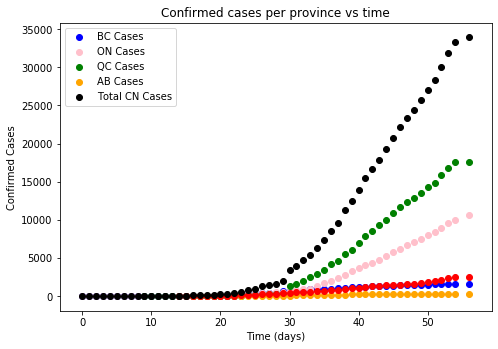

In [65]:
#develop plots for data. Linear plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
BC_Graph = ax.scatter(CN_days, BC['Confirmed-Cases'], color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax.scatter(CN_days, ON['Confirmed-Cases'], color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax.scatter(QC_days, QC['Confirmed-Cases'], color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax.scatter(SK_days, SK['Confirmed-Cases'], color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax.scatter(AB_days, AB['Confirmed-Cases'], color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax.scatter(CN_days, CN['Confirmed-Cases'], color='black')
CN_Graph.set_label('Total CN Cases')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed cases per province vs time')
ax.legend()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

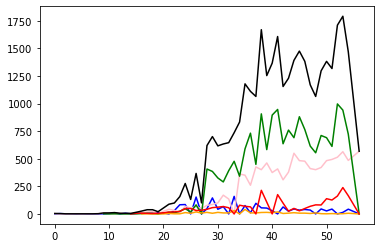

In [78]:
import matplotlib.pyplot as plt
fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.plot(CN_days, BC['Total-Today'], color='blue')

plt.plot(CN_days, ON['Total-Today'], color='pink')

plt.plot(QC_days, QC['Total-Today'], color='g')

plt.plot(SK_days, SK['Total-Today'], color='orange')

plt.plot(AB_days, AB['Total-Today'], color='red')

plt.plot(CN_days, CN['Total-Today'], color='black')


plt.set_xlabel('Time (days)')
plt.set_ylabel('Confirmed Cases')
plt.set_title('Confirmed cases per province vs time')
plt.legend()
plt.show()

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


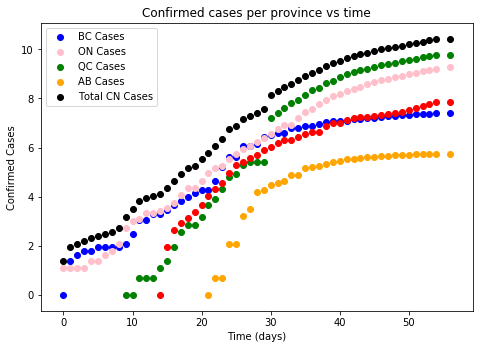

In [66]:
#develop logrithmic plot
fig1=plt.figure()
ax1=fig1.add_axes([0,0,1,1])
BC_Graph = ax1.scatter(CN_days, np.log(BC['Confirmed-Cases']), color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax1.scatter(CN_days, np.log(ON['Confirmed-Cases']), color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax1.scatter(QC_days, np.log(QC['Confirmed-Cases']), color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax1.scatter(SK_days, np.log(SK['Confirmed-Cases']), color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax1.scatter(AB_days, np.log(AB['Confirmed-Cases']), color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax1.scatter(CN_days, np.log(CN['Confirmed-Cases']), color='black')
CN_Graph.set_label('Total CN Cases')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Confirmed Cases')
ax1.set_title('Confirmed cases per province vs time')
ax1.legend()
plt.show()

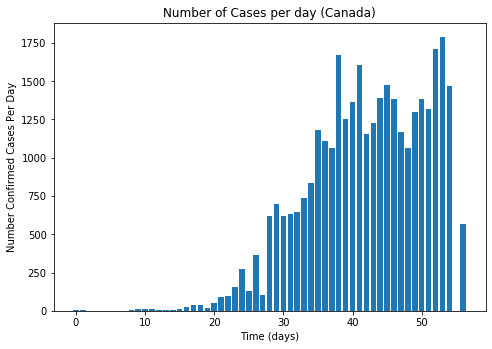

In [74]:

fig2=plt.figure()
ax2=fig2.add_axes([0,0,1,1])
CN_Graph = ax2.bar(CN_days, CN['Total-Today'])
CN_Graph.set_label('Total CN Cases')

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number Confirmed Cases Per Day')
ax2.set_title('Number of Cases per day (Canada)')

plt.show()

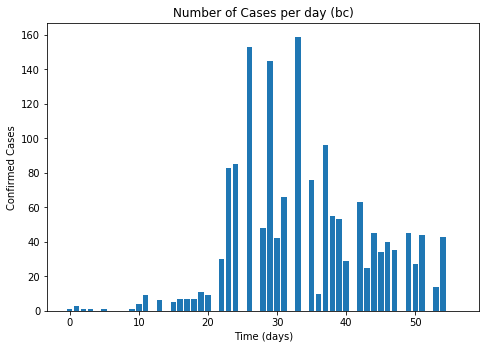

In [75]:
fig3=plt.figure()
ax3=fig3.add_axes([0,0,1,1])
ax3.bar(CN_days, BC['Total-Today'])

ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Confirmed Cases')
ax3.set_title('Number of Cases per day (bc)')

plt.show()